In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Users_lit.csv")


In [15]:
df.head(10)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,WebsiteUrl,LocationCountry
0,-1,1,2017-01-17T21:06:00.463,Community,2017-01-17T21:06:00.463,on the server farm,"<p>Hi, I'm not really a person.</p>\r\n<p>I'm ...",167,0,0,-1.0,NaN,NaN
1,1,101,2017-01-17T22:20:36.807,Adam Lear,2024-03-12T19:53:10.587,"new york, ny",\n<p>Developer at Stack Overflow focusing on p...,247,1,0,37099.0,NaN,united states
2,2,99,2017-01-18T17:15:15.747,Robert Cartaino,2019-03-05T15:39:40.877,"palm bay, fl","<p><a href=""http://blog.stackoverflow.com/2010...",44,5,8,34933.0,NaN,united states
3,3,739,2017-01-18T17:15:26.043,JNat,2024-02-23T15:57:27.180,europe,<p>I was appointed ♦ Moderator Pro Tempore on ...,62,9,3,1399708.0,http://anime.stackexchange.com/users/49/jnat,NaN
4,4,101,2017-01-18T17:15:45.740,Shog9,2023-08-28T14:00:09.347,"frontier, wa, usa","<p>Well, fancy seeing you here!</p>\n<p>I work...",28,6,3,620.0,http://shog9.com,united states
5,5,101,2017-01-18T17:17:27.103,Jon Ericson,2020-10-19T18:33:49.020,downtown burbank,"<p>Visit <a href=""https://buildcivitas.com/"" r...",17,5,0,1083.0,https://jlericson.com/,NaN
6,6,101,2017-01-18T17:18:01.143,animuson,2023-03-06T17:57:24.860,united states,\n<p>I work for Stack Overflow as a Staff Supp...,19,0,0,89201.0,https://animuson.me,united states
7,7,101,2017-01-18T17:23:38.213,Taryn,2020-08-18T17:07:06.777,arizona,"<p>developer, techie, nerd.... ex-DBRE at Stac...",13,0,0,188123.0,https://tarynpivots.com,NaN
8,9,6218,2017-01-18T17:23:40.530,Beastly Gerbil,2024-01-02T19:51:10.130,neverland,NaN,283,82,12,7477792.0,NaN,NaN
9,10,449,2017-01-18T17:23:42.023,soundslikeodd,2023-05-11T14:30:24.660,"long beach, ca, united states","<a href=""http://stackexchange.com/users/891683...",24,41,2,8916832.0,NaN,united states


In [16]:
LocationCountry = df["LocationCountry"]
counts = LocationCountry.value_counts().sort_values(ascending = False)
total = LocationCountry.count()
print(total)
print(counts.head(30))

3953
LocationCountry
united states                1344
united kingdom                407
india                         404
germany                       164
canada                        148
australia                     138
france                        105
netherlands                    65
sweden                         52
brazil                         44
spain                          44
italy                          41
china                          38
israel                         38
viet nam                       37
russian federation             36
switzerland                    36
czechia                        32
indonesia                      31
iran, islamic republic of      30
new zealand                    30
poland                         29
japan                          28
ireland                        26
bangladesh                     26
romania                        24
turkey                         24
pakistan                       24
argentina                  

Location such as: east bay, ♁, https://www.gofundme.com/f/stop-stack-overflow-from-defaming-its-users, dilaton@physicsoverflow.org. Get's filtered out, which is why 66479 - 56553 =9 926 rows get's removed as a form of cleaning from the data.

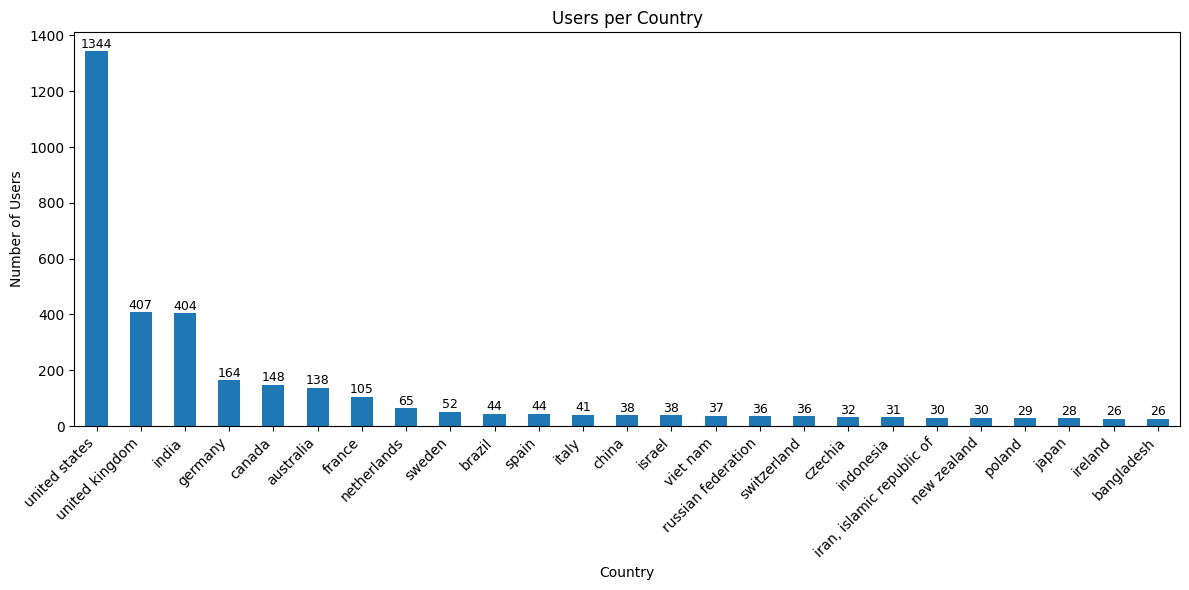

In [17]:
counts = df["LocationCountry"].value_counts().sort_values(ascending=False)
counts = counts.head(25)
ax = counts.plot(kind="bar", figsize=(12, 6))
plt.title("Users per Country")
plt.ylabel("Number of Users")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")

# Add count labels
for i, val in enumerate(counts):
    ax.text(i, val + 1, str(val), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

# Visualise changes in country over time:

In [18]:
df["CreationDate"] = pd.to_datetime(df["CreationDate"])
df["Year"] = df["CreationDate"].dt.year

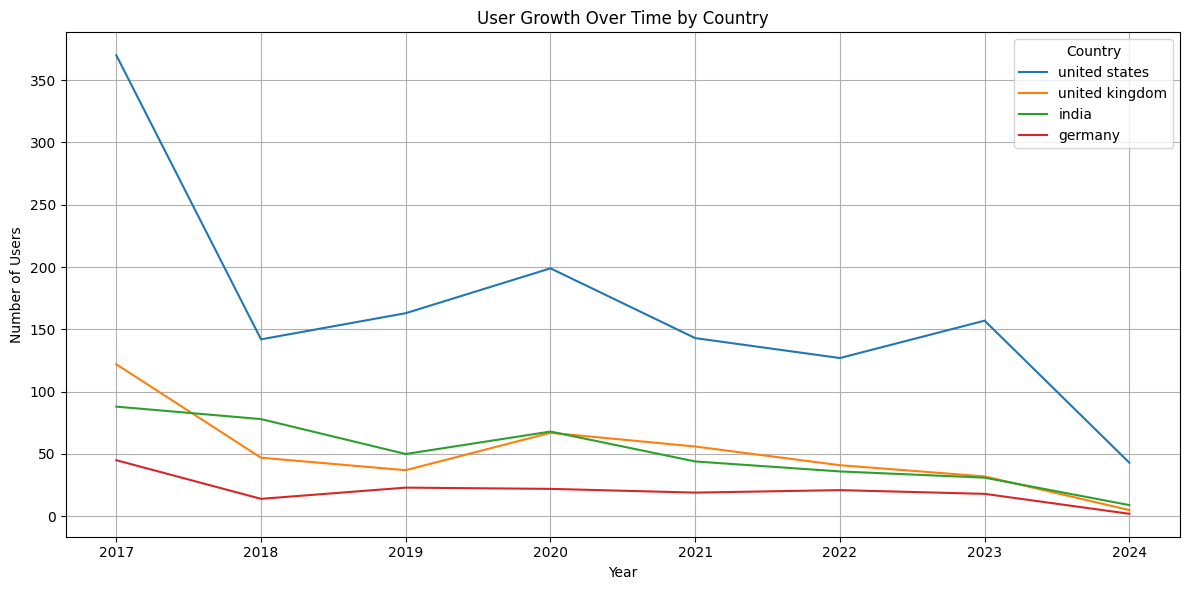

In [19]:
country_year = df.groupby(["Year", "LocationCountry"]).size().unstack(fill_value=0)

top_countries = df["LocationCountry"].value_counts().head(4).index

# Plot only those
country_year[top_countries].plot(figsize=(12, 6))

plt.title("User Growth Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Number of Users")
plt.grid(True)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

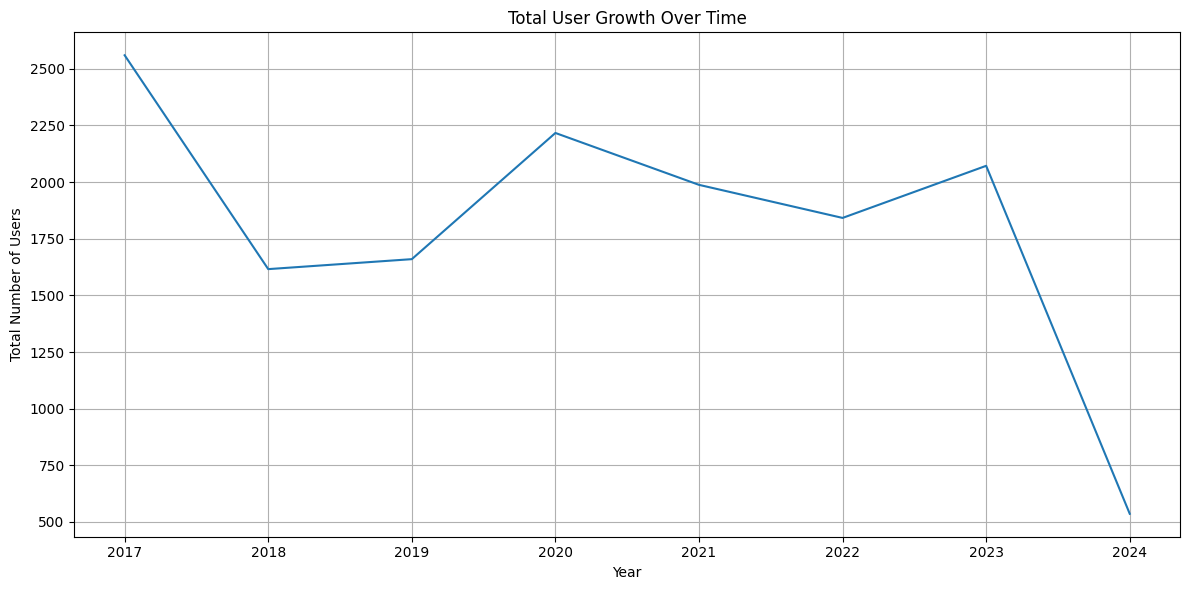

In [20]:
total_per_year = df.groupby("Year").size()

# Plot total user growth per year
total_per_year.plot(figsize=(12, 6))

plt.title("Total User Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Total Number of Users")
plt.grid(True)
plt.tight_layout()
plt.show()

# Account lifetime

In [21]:
df["CreationDate"] = pd.to_datetime(df["CreationDate"])
df["LastAccessDate"] = pd.to_datetime(df["LastAccessDate"])
df["AccountLifetimeDays"] = (df["LastAccessDate"] - df["CreationDate"]).dt.days
df["AccountLifetimeYears"] = df["AccountLifetimeDays"] / 365
# split the data
under_1_year = df[df["AccountLifetimeYears"] < 1]
over_1_year = df[df["AccountLifetimeYears"] >= 1]

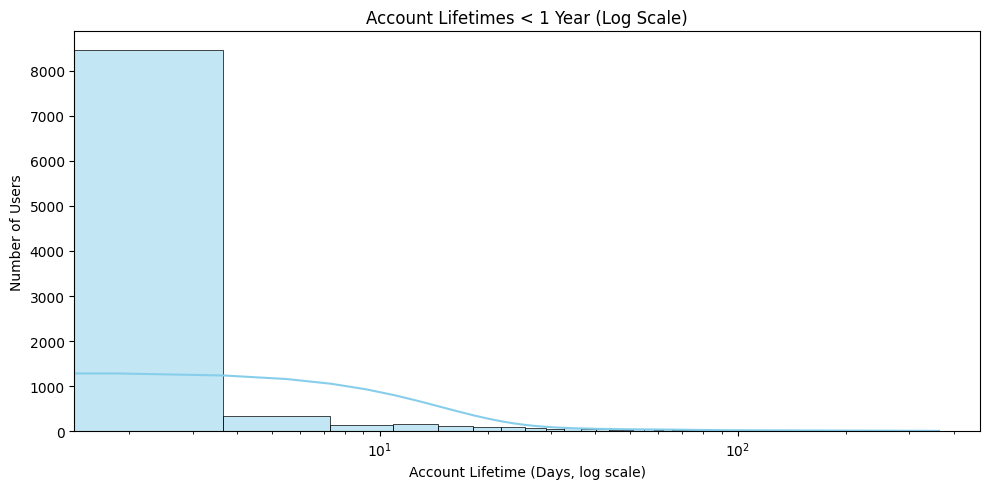

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=under_1_year,
    x="AccountLifetimeDays",
    bins=100,
    kde=True,
    color="skyblue",
    edgecolor="black"
)
plt.xscale("log")
plt.title("Account Lifetimes < 1 Year (Log Scale)")
plt.xlabel("Account Lifetime (Days, log scale)")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()


/var/folders/7k/0ysh65352j9bnvtmhpr3kcs00000gn/T/ipykernel_5473/817205234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_1_year["LifetimeBin"] = pd.cut(


,Lifetime Range (Days),Number of Users,Percentage of Users
0,0,7 845,70.87
1,1–2,503,4.54
2,3–6,362,3.27
3,7–13,348,3.14
4,14–29,398,3.60
5,30–59,375,3.39
6,60–89,226,2.04
7,90–179,420,3.79
8,180–364,592,5.35


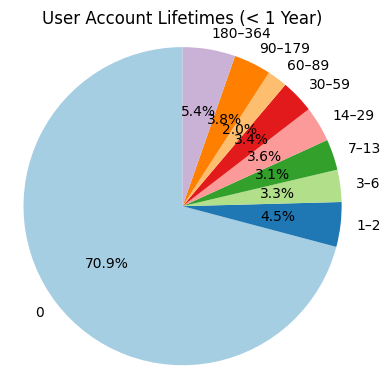

In [28]:
bins = [0, 1, 3, 7, 14, 30, 60, 90, 180, 365]
labels = ["0", "1–2", "3–6", "7–13", "14–29", "30–59", "60–89", "90–179", "180–364"]

under_1_year["LifetimeBin"] = pd.cut(
    under_1_year["AccountLifetimeDays"], bins=bins, labels=labels, right=False
)

# Compute counts and percentages
counts = under_1_year["LifetimeBin"].value_counts().sort_index()
percentages = under_1_year["LifetimeBin"].value_counts(normalize=True).sort_index().mul(100).round(2)

# Combine into table
table = pd.DataFrame({
    "Lifetime Range (Days)": labels,
    "Number of Users": counts.values,
    "Percentage of Users": percentages.values
})
table["Number of Users"] = table["Number of Users"].apply(lambda x: f"{x:,}".replace(",", " "))

from IPython.display import display
display(table)

# Create pie chart
plt.figure(figsize=(4, 4))

plt.pie(
    table["Percentage of Users"],
    labels=table["Lifetime Range (Days)"],
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title("User Account Lifetimes (< 1 Year)")
plt.axis("equal")  # Make it a circle
plt.tight_layout()
plt.show()



In [29]:
quantile_bins = pd.qcut(
    under_1_year["AccountLifetimeDays"],
    q=10,
    precision=0,
    duplicates="drop"
)

quantile_table = (
    quantile_bins.value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .round(2)
    .reset_index()
)
quantile_table.columns = ["Lifetime Range (Quantile)", "Percentage of Users"]

quantile_table


,Lifetime Range (Quantile),Percentage of Users
0,"(-1.0, 9.0]",80.32
1,"(9.0, 75.0]",9.76
2,"(75.0, 364.0]",9.92


,Lifetime Range,Number of Users,Percentage of Users,Raw Count
0,0 days,7 845,54.14,7845
1,1–2 days,503,3.47,503
2,3–6 days,362,2.50,362
3,7–13 days,348,2.40,348
4,14–29 days,398,2.75,398
5,30–59 days,375,2.59,375
6,60–89 days,226,1.56,226
7,90–179 days,420,2.90,420
8,180–364 days,592,4.09,592
9,1–2 years,858,5.92,858


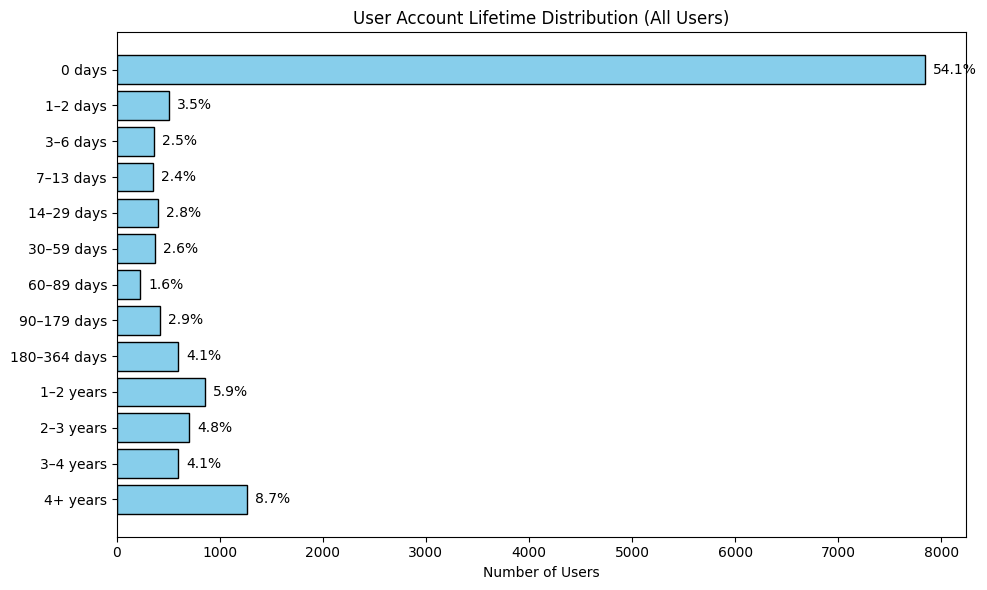

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins and original labels
bins = [0, 1, 3, 7, 14, 30, 60, 90, 180, 365, 730, 1095, 1460, float("inf")]
labels = [
    "0", "1–2", "3–6", "7–13", "14–29", "30–59", "60–89", "90–179",
    "180–364", "1–2 years", "2–3 years", "3–4 years", "4+ years"
]

# Add " days" to day-based labels
day_labels = {"0", "1–2", "3–6", "7–13", "14–29", "30–59", "60–89", "90–179", "180–364"}
modified_labels = [label + " days" if label in day_labels else label for label in labels]

# Bin the data
df["LifetimeBin"] = pd.cut(df["AccountLifetimeDays"], bins=bins, labels=modified_labels, right=False)

# Compute counts and percentages
counts = df["LifetimeBin"].value_counts().sort_index()
percentages = df["LifetimeBin"].value_counts(normalize=True).sort_index().mul(100).round(2)

# Build table
table = pd.DataFrame({
    "Lifetime Range": modified_labels,
    "Number of Users": counts.values,
    "Percentage of Users": percentages.values
})
table["Raw Count"] = table["Number of Users"]  # used for plotting
table["Number of Users"] = table["Number of Users"].apply(lambda x: f"{x:,}".replace(",", " "))

# Display table (optional)
from IPython.display import display
display(table)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(table["Lifetime Range"], table["Raw Count"], color="skyblue", edgecolor="black")

# Add percent labels to bars
for bar, pct in zip(bars, table["Percentage of Users"]):
    width = bar.get_width()
    plt.text(width + max(table["Raw Count"]) * 0.01, bar.get_y() + bar.get_height()/2, f"{pct:.1f}%", va='center')

plt.xlabel("Number of Users")
plt.title("User Account Lifetime Distribution (All Users)")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


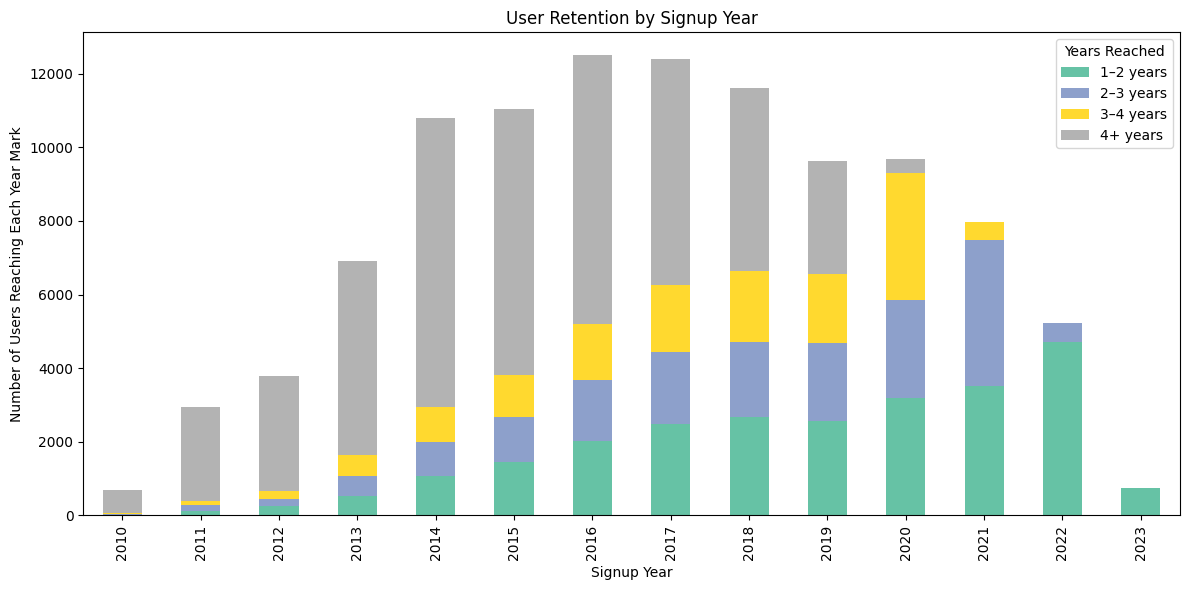

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
df["CreationDate"] = pd.to_datetime(df["CreationDate"])

# Extract signup year
df["SignupYear"] = df["CreationDate"].dt.year

# Keep only users who reached at least 1 year
df_1yr_plus = df[df["AccountLifetimeDays"] >= 365].copy()

# Define lifetime bins (in days) and labels
bins = [365, 730, 1095, 1460, float("inf")]
labels = ["1–2 years", "2–3 years", "3–4 years", "4+ years"]


df_1yr_plus["YearsReached"] = pd.cut(
    df_1yr_plus["AccountLifetimeDays"],
    bins=bins,
    labels=labels,
    right=False
)

# Group by cohort (signup year) and how many years they reached
cohort_retention = (
    df_1yr_plus.groupby(["SignupYear", "YearsReached"])
    .size()
    .unstack(fill_value=0)
)

# Plot stacked bar chart
cohort_retention.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")
plt.title("User Retention by Signup Year")
plt.xlabel("Signup Year")
plt.ylabel("Number of Users Reaching Each Year Mark")
plt.legend(title="Years Reached")
plt.tight_layout()
plt.show()



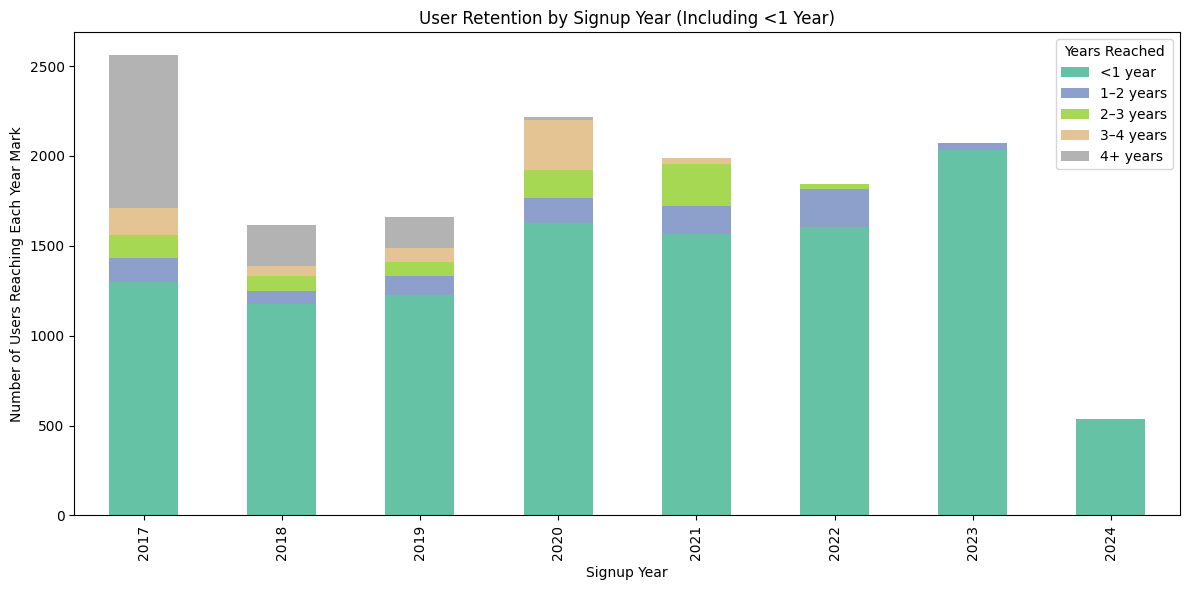

YearsReached,<1 year,1–2 years,2–3 years,3–4 years,4+ years,Total Users
SignupYear,,,,,,
2017,1301 (50.8%),130 (5.1%),130 (5.1%),150 (5.9%),849 (33.2%),2560
2018,1176 (72.8%),74 (4.6%),80 (5.0%),58 (3.6%),228 (14.1%),1616
2019,1226 (73.9%),107 (6.4%),77 (4.6%),78 (4.7%),172 (10.4%),1660
2020,1625 (73.3%),143 (6.5%),154 (6.9%),277 (12.5%),18 (0.8%),2217
2021,1566 (78.8%),157 (7.9%),234 (11.8%),31 (1.6%),0 (0.0%),1988
2022,1607 (87.2%),207 (11.2%),28 (1.5%),0 (0.0%),0 (0.0%),1842
2023,2032 (98.1%),40 (1.9%),0 (0.0%),0 (0.0%),0 (0.0%),2072
2024,536 (100.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),536


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
df["CreationDate"] = pd.to_datetime(df["CreationDate"])

# Extract signup year
df["SignupYear"] = df["CreationDate"].dt.year

# Define new bins and labels, including "<1 year"
bins = [0, 365, 730, 1095, 1460, float("inf")]
labels = ["<1 year", "1–2 years", "2–3 years", "3–4 years", "4+ years"]

# Bin users
df["YearsReached"] = pd.cut(df["AccountLifetimeDays"], bins=bins, labels=labels, right=False)

# Group by cohort and years reached
cohort_retention = (
    df.groupby(["SignupYear", "YearsReached"])
    .size()
    .unstack(fill_value=0)
)

# Plot
cohort_retention.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")
plt.title("User Retention by Signup Year (Including <1 Year)")
plt.xlabel("Signup Year")
plt.ylabel("Number of Users Reaching Each Year Mark")
plt.legend(title="Years Reached")
plt.tight_layout()
plt.show()

# Create table with counts + percentages
counts = cohort_retention.copy()
percentages = counts.div(counts.sum(axis=1), axis=0).mul(100).round(1)
combined = counts.astype(str) + " (" + percentages.astype(str) + "%)"
combined["Total Users"] = counts.sum(axis=1)

# Display
from IPython.display import display
display(combined)


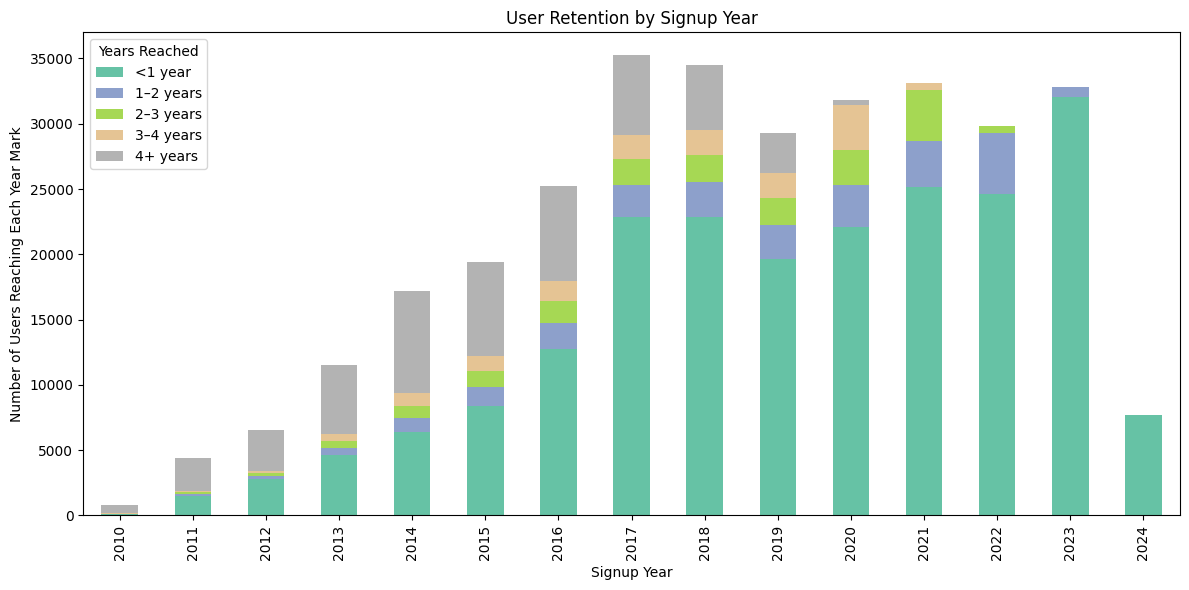

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
df["CreationDate"] = pd.to_datetime(df["CreationDate"])

# Extract signup year
df["SignupYear"] = df["CreationDate"].dt.year

# Use all users (not just those with 1+ years)
df_all = df.copy()

# Define lifetime bins (in days) and labels
bins = [0, 365, 730, 1095, 1460, float("inf")]
labels = ["<1 year", "1–2 years", "2–3 years", "3–4 years", "4+ years"]

# Bin lifetimes into years reached
df_all["YearsReached"] = pd.cut(
    df_all["AccountLifetimeDays"],
    bins=bins,
    labels=labels,
    right=False
)

# Group by cohort (signup year) and how many years they reached
cohort_retention = (
    df_all.groupby(["SignupYear", "YearsReached"])
    .size()
    .unstack(fill_value=0)
)

# Plot stacked bar chart
cohort_retention.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")
plt.title("User Retention by Signup Year")
plt.xlabel("Signup Year")
plt.ylabel("Number of Users Reaching Each Year Mark")
plt.legend(title="Years Reached")
plt.tight_layout()
plt.show()
